# GOAL:
# What brings success to youtubers. For that I will analyse the following
1.subscribers
2.view count
3.money earned(monthly/yearly)

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

warnings.filterwarnings("ignore")

In [2]:
# reading the csv file
df = pd.read_csv(r'C:\Users\AJAY\Downloads\youtube dataset.zip',encoding = 'ISO-8859-1')

Getting much information as possible from the data

In [4]:
df.shape

(995, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [78]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [6]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


# Data visualisation

Top 10 Youtubers with most subscribers

In [7]:
# since the dataframe is in ranking order so we can take the top 10 just by taking the first ten values
dp = df.head(10)
dp

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


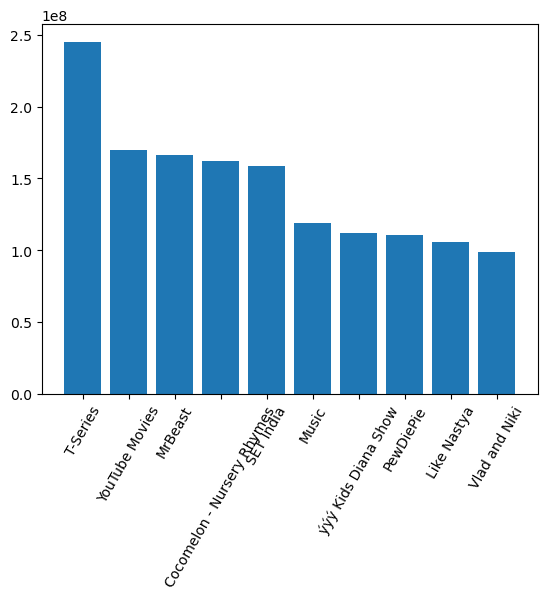

In [8]:
# plotting 
plt.bar(dp['Youtuber'], dp['subscribers'])
plt.xticks(rotation = 60)
plt.show()

# Country with most channels

In [9]:
# creating a new object for counting the country values for plotting barplot 
country_count = pd.DataFrame(df['Country'].value_counts().head(10))
country_count

,Country
United States,313
India,168
Brazil,62
United Kingdom,43
Mexico,33
Indonesia,28
Spain,22
Thailand,18
South Korea,17
Russia,16


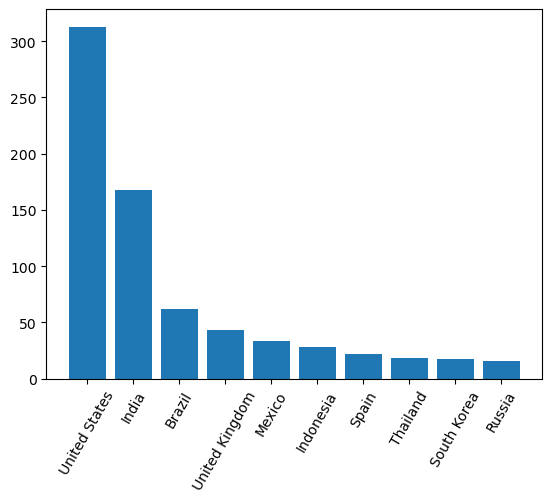

In [10]:
#plotting
plt.bar(country_count.index,country_count['Country'])
plt.xticks(rotation = 60)
plt.show()

By observing the above plot we can see U.S.A and India has the most no.of channels

# Channel type with most channels

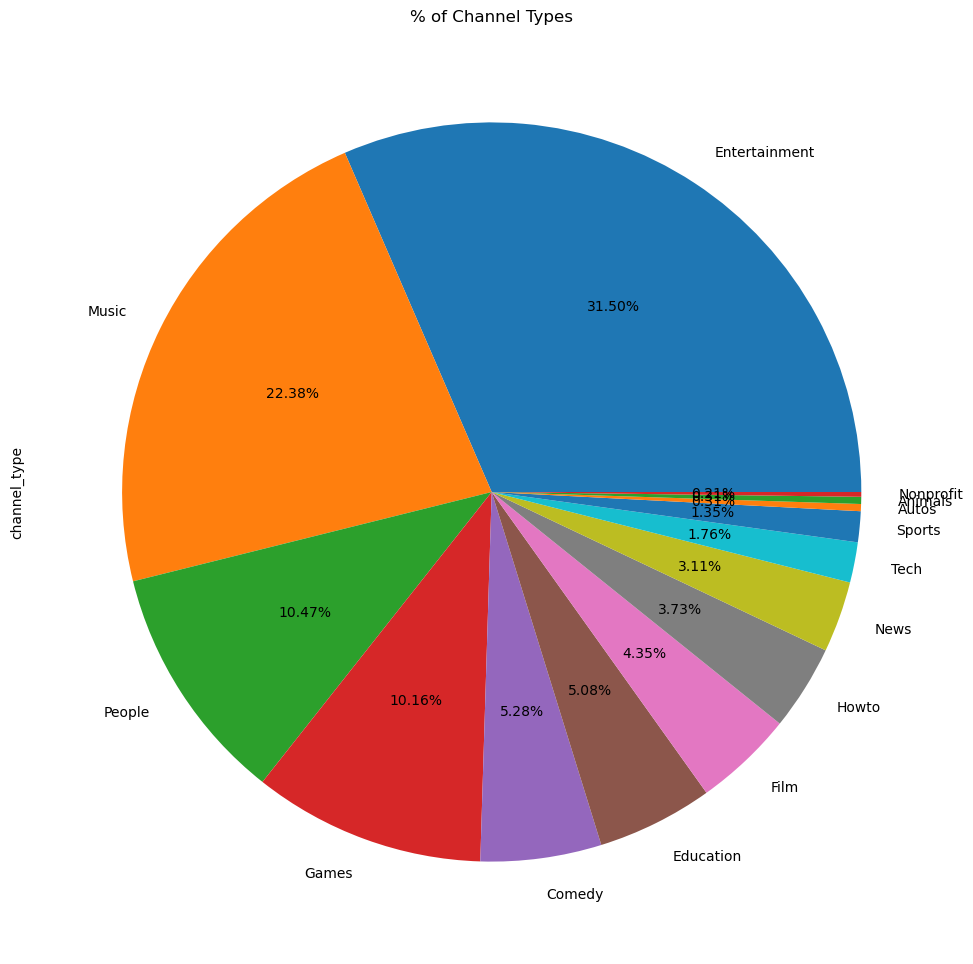

In [123]:
# for this making a pie chart showing percentage of each channe type
chan_type_pie = df['channel_type'].value_counts() #Counting channel types
plt.figure(figsize=(12, 12))
chan_type_pie.plot(kind='pie', autopct='%1.2f%%') #Shows 2 decimal digits of %

plt.title('% of Channel Types') #Title
plt.show()

From the graph Entertainment,Music,People,Games have the most no.of channels

Next I will handling missing values and outliers

# Selecting features

<Axes: >

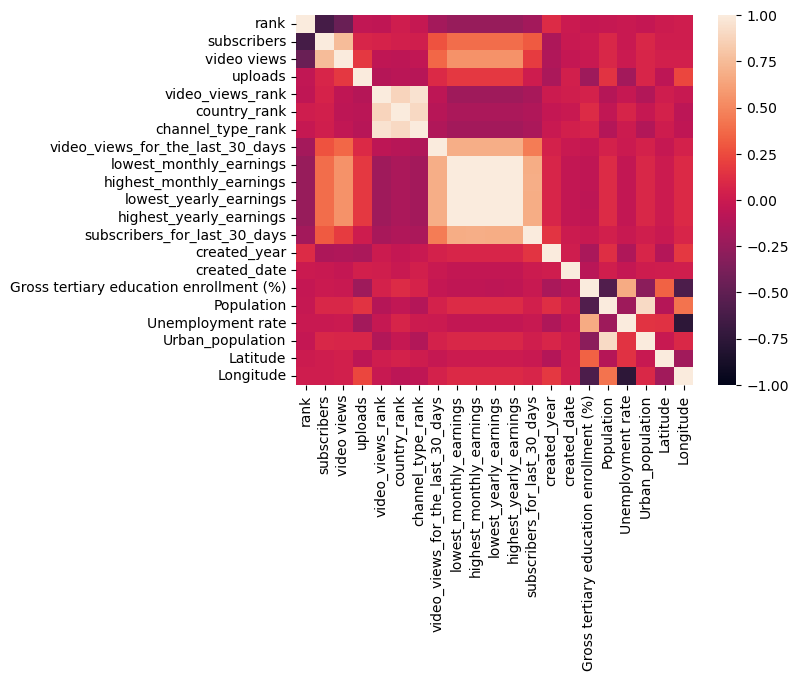

In [12]:
# for selecting features plotting heatmap for seeing correlation between features
cor = df.corr()
cor
sns.heatmap(cor, vmax=1, vmin=-1) # taking vmin as -1 because rank and other features are in descending order which shows negative correlation

By observing the heatmap I will select the features I want for the projects goal

In [13]:
# features needed for analysing subscribers
features_sub = ['video views','Urban_population','video_views_for_the_last_30_days']
df_sub = df[features_sub]
df_sub

,video views,Urban_population,video_views_for_the_last_30_days
0,2.280000e+11,471031528.0,2.258000e+09
1,0.000000e+00,270663028.0,1.200000e+01
2,2.836884e+10,270663028.0,1.348000e+09
3,1.640000e+11,270663028.0,1.975000e+09
4,1.480000e+11,471031528.0,1.824000e+09
...,...,...,...
990,9.029610e+09,183241641.0,5.525130e+08
991,1.674410e+09,471031528.0,6.473500e+07
992,2.214684e+09,55908316.0,6.703500e+04
993,3.741235e+08,9021165.0,3.871000e+06


I will only display one for convenience purpose

In [14]:
# features required for analysing view counts
features_views = ['subscribers','uploads']
df_views = df[features_views]

In [15]:
# features required for analysing highest money earned in the last month
features_money_mon = ['subscribers','uploads','video views','video_views_for_the_last_30_days','subscribers_for_last_30_days']
df_money_mon = df[features_money_mon]

In [16]:
# features required for analysing highest money earned yearly
features_money_year = ['subscribers','uploads','video views']
df_money_year = df[features_money_year]

# Numerical values

In [17]:
# priting all numerical values in each features
numerical_features= [feature for feature in df.columns if df[feature].dtypes != 'O']
df_num = df[numerical_features]
df_num

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,700000.0,2017.0,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,300000.0,2018.0,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,...,3.200000e+03,1000.0,2006.0,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,100000.0,2012.0,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# Categorical values

In [18]:
# selecting categorical feature
categorical_features = [feature for feature in df if df[feature].dtypes == 'O']
df_cat = df[categorical_features]
df_cat

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
992,Panda,NaN,HybridPanda,United Kingdom,GB,Games,Sep
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [19]:
#printing all categorical values
for feature in categorical_features:
    print("The feature is {} and they are {}".format(feature,df[feature].unique()))

The feature is Youtuber and they are ['T-Series' 'YouTube Movies' 'MrBeast' 'Cocomelon - Nursery Rhymes'
 'SET India' 'Music' 'ýýý Kids Diana Show' 'PewDiePie' 'Like Nastya'
 'Vlad and Niki' 'Zee Music Company' 'WWE' 'Gaming' 'BLACKPINK'
 'Goldmines' 'Sony SAB' '5-Minute Crafts' 'BANGTANTV' 'Sports'
 'Justin Bieber' 'HYBE LABELS' 'Zee TV'
 "Pinkfong Baby Shark - Kids' Songs & Stories" 'Canal KondZilla'
 'ChuChu TV Nursery Rhymes & Kids Songs' 'Shemaroo Filmi Gaane'
 'Colors TV' 'T-Series Bhakti Sagar' 'Dude Perfect' 'Movieclips'
 'Tips Official' 'El Reino Infantil' 'Wave Music' 'Aaj Tak'
 'Sony Music India' 'EminemMusic' 'Marshmello' 'YRF'
 "LooLoo Kids - Nursery Rhymes and Children's Songs" 'Ed Sheeran'
 'Infobells - Hindi' 'Taylor Swift' 'Ariana Grande'
 'BillionSurpriseToys  - Nursery Rhymes & Cartoons' 'JuegaGerman'
 'Billie Eilish' 'Get Movies' 'Shemaroo' 'Badabun' 'SonyMusicIndiaVEVO'
 'A4' 'Bad Bunny' 'Fernanfloo' 'Voot Kids' 'Felipe Neto' 'Vocï¿½ï¿½ï¿½'
 'HAR PAL GEO' 'BRIGHT S

In [20]:
# printing the total number of categories in each feature
for feature in categorical_features:
    print("The feature is {} and there count is {}".format(feature,len(df[feature].unique())))

The feature is Youtuber and there count is 995
The feature is category and there count is 19
The feature is Title and there count is 992
The feature is Country and there count is 50
The feature is Abbreviation and there count is 50
The feature is channel_type and there count is 15
The feature is created_month and there count is 13


# Missing values

In [21]:
# total number of missing values in each features
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [22]:
#selecting the rows with missing values
ds = df[df.isnull().any(1)]
ds

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,MoniLina,12400000,1.608681e+10,Comedy,MoniLinaFamily,0,United States,US,People,...,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


In [24]:
# checking the percentage of missing values in each feature
# feature_nan is a list of feature having missing values
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]

# printing the percentage of missing values
for feature in feature_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,4),"% missing values")

category 4.6231 % missing values
Country 12.2613 % missing values
Abbreviation 12.2613 % missing values
channel_type 3.0151 % missing values
video_views_rank 0.1005 % missing values
country_rank 11.6583 % missing values
channel_type_rank 3.3166 % missing values
video_views_for_the_last_30_days 5.6281 % missing values
subscribers_for_last_30_days 33.8693 % missing values
created_year 0.5025 % missing values
created_month 0.5025 % missing values
created_date 0.5025 % missing values
Gross tertiary education enrollment (%) 12.3618 % missing values
Population 12.3618 % missing values
Unemployment rate 12.3618 % missing values
Urban_population 12.3618 % missing values
Latitude 12.3618 % missing values
Longitude 12.3618 % missing values


# Outliers

<Axes: xlabel='subscribers'>

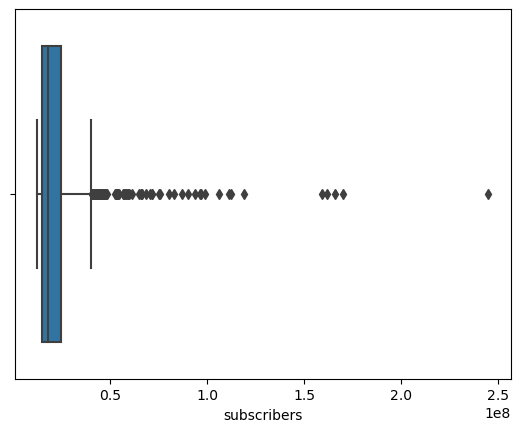

In [26]:
# plotting boxplot for checking the outliers in subscribers column. Since it is one of the goals
sns.boxplot(x=df['subscribers'])

<Axes: xlabel='video views'>

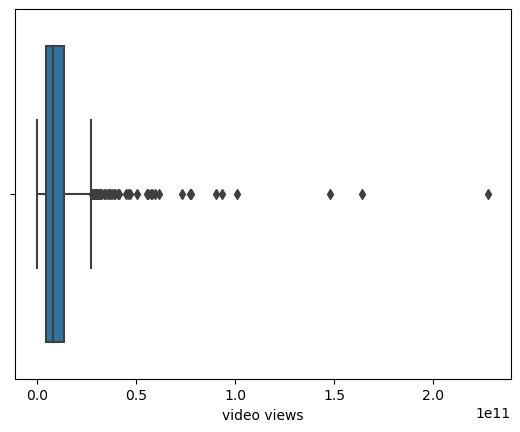

In [27]:
# plotting boxplot for checking the outliers in video views column. Since it is one of the goals
sns.boxplot(x=df['video views'])

<Axes: xlabel='highest_monthly_earnings'>

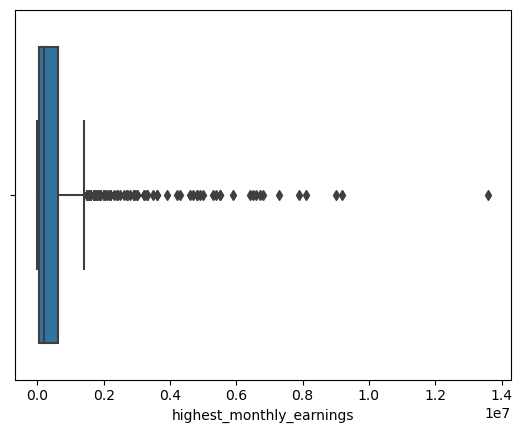

In [28]:
# plotting boxplot for checking the outliers in highest_monthly_earnings column. Since it is one of the goals
sns.boxplot(x=df['highest_monthly_earnings'])

<Axes: xlabel='highest_yearly_earnings'>

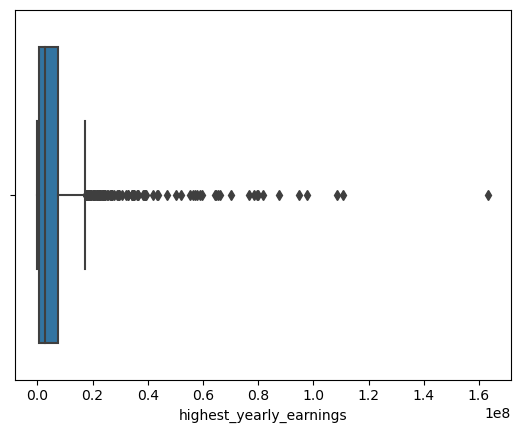

In [29]:
# plotting boxplot for checking the outliers in highest_yearly_earnings column. Since it is one of the goals
sns.boxplot(x=df['highest_yearly_earnings'])

From the above three plots we can see that the three columns have outliers

Next I will check for outliers in these three columns by comparing them with the features I selected before by using scatter plot

# Outliers for subscribers

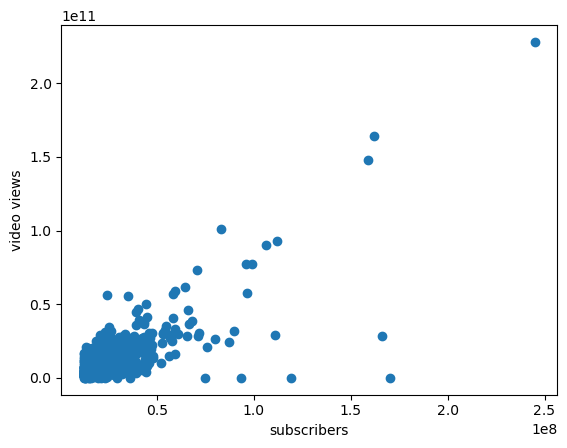

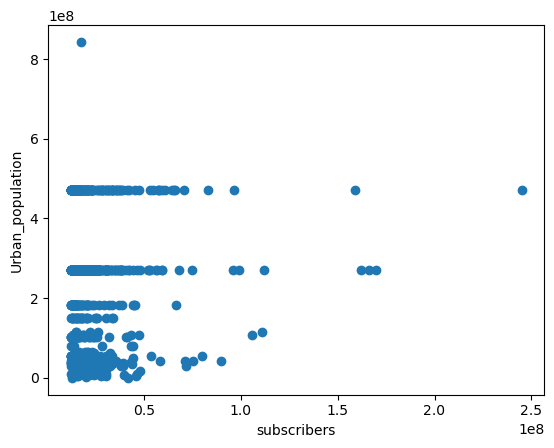

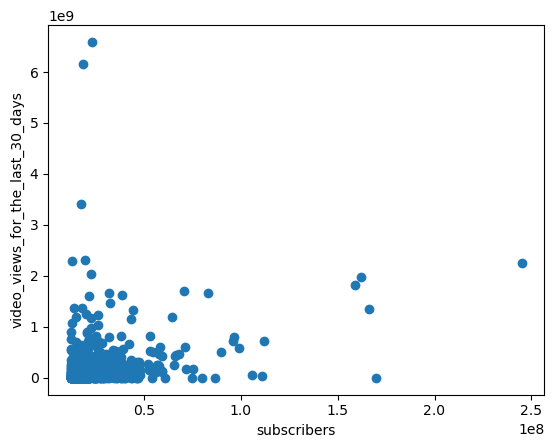

In [31]:
# finding for outliers using scatter for subscribers in features_sub
for i in df[features_sub]:
    plt.figure()
    plt.scatter(x=df['subscribers'], y= df[features_sub][i])
    plt.xlabel('subscribers')
    plt.ylabel(i)
    plt.show()

By observing the plots subscribers feature has a lot of outliers

# Outliers for video views

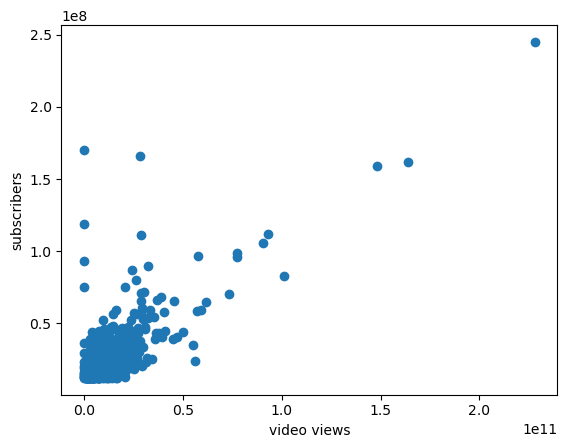

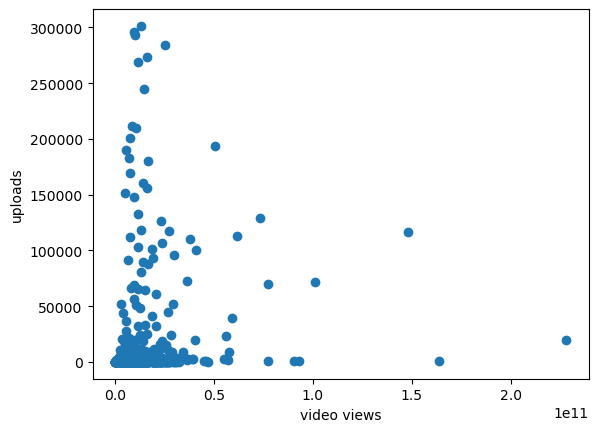

In [32]:
# finding for outliers using scatter for video views in features_views
for i in df[features_views]:
    plt.figure()
    plt.scatter(x=df['video views'], y= df[features_views][i])
    plt.xlabel('video views')
    plt.ylabel(i)
    plt.show()

By observing the plot video views has lot of outliers

# Outliers for highest money earned in last month

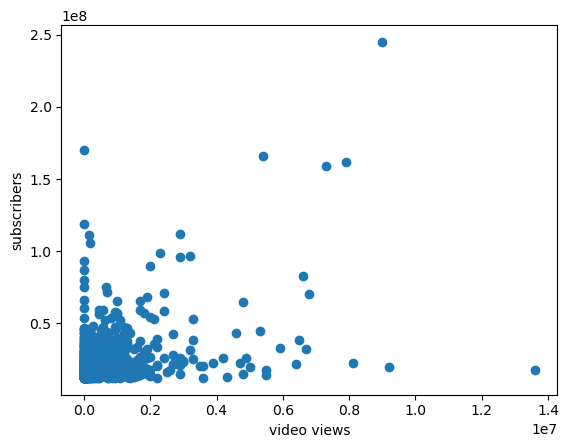

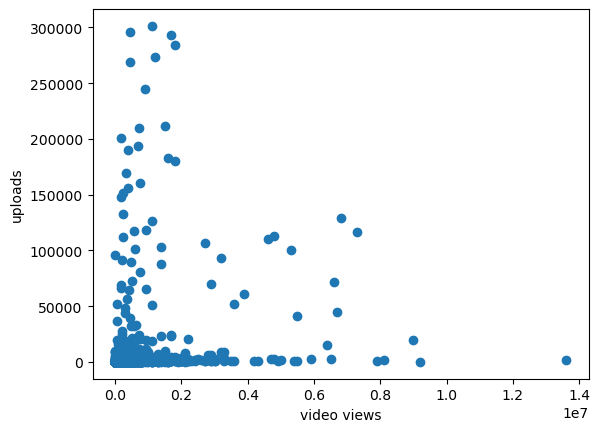

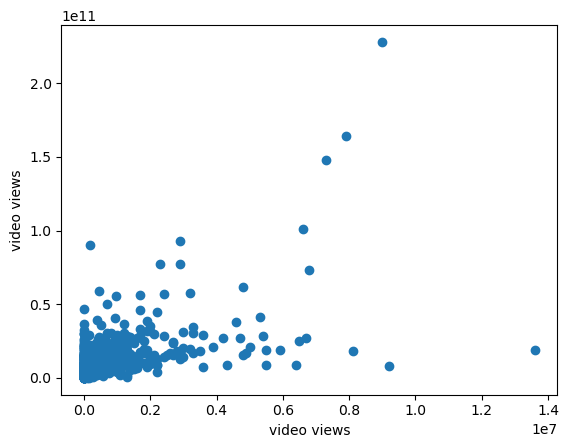

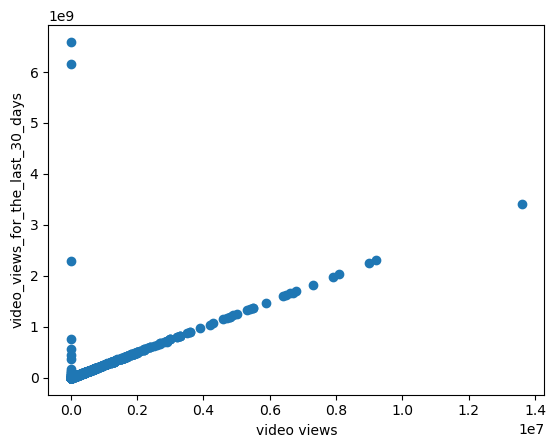

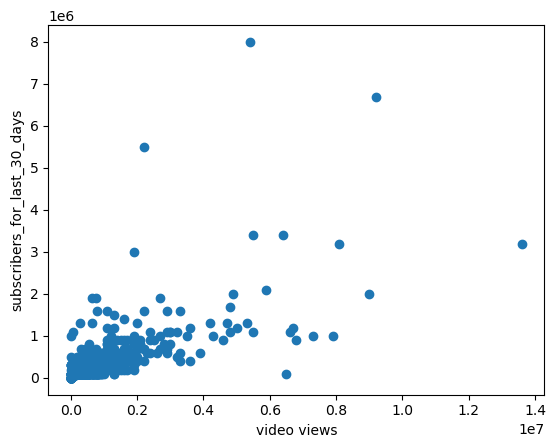

In [33]:
# finding for outliers using scatter for highest_monthly_earnings in features_money_mon
for i in df[features_money_mon]:
    plt.figure()
    plt.scatter(x=df['highest_monthly_earnings'], y= df[features_money_mon][i])
    plt.xlabel('video views')
    plt.ylabel(i)
    plt.show()

# Outliers for highest money earned yearly

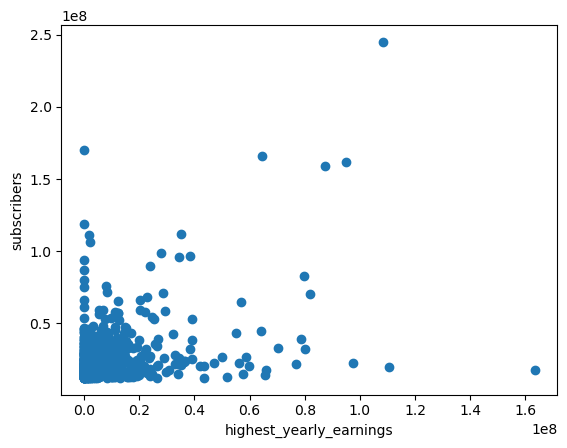

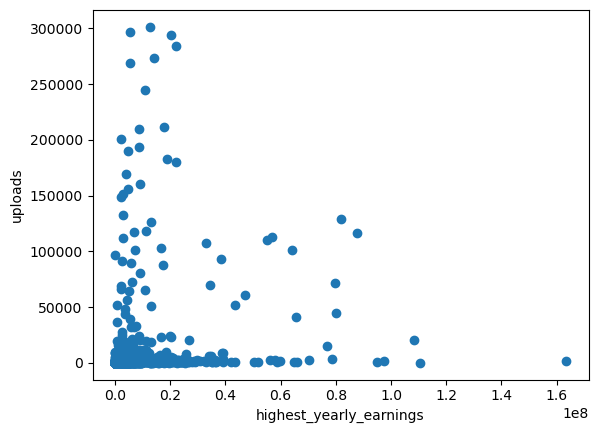

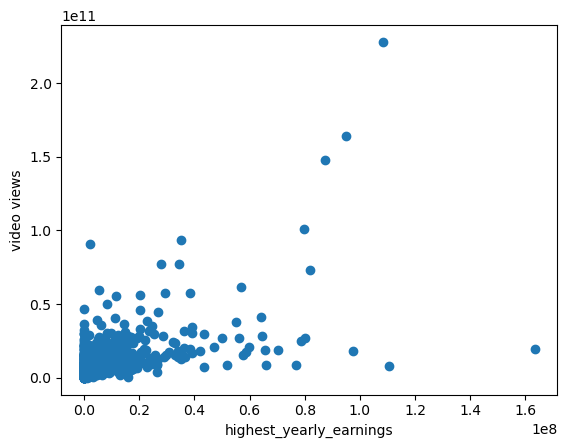

In [34]:
# finding for outliers using scatter for highest_yearly_earnings in features_money_year
for i in df[features_money_year]:
    plt.figure()
    plt.scatter(x=df['highest_yearly_earnings'], y= df[features_money_year][i])
    plt.xlabel('highest_yearly_earnings')
    plt.ylabel(i)
    plt.show()

By observing above plot highest_yearly_earnings and highest_monthly_earnings has lot of outliers

# Handling missing values

<Axes: >

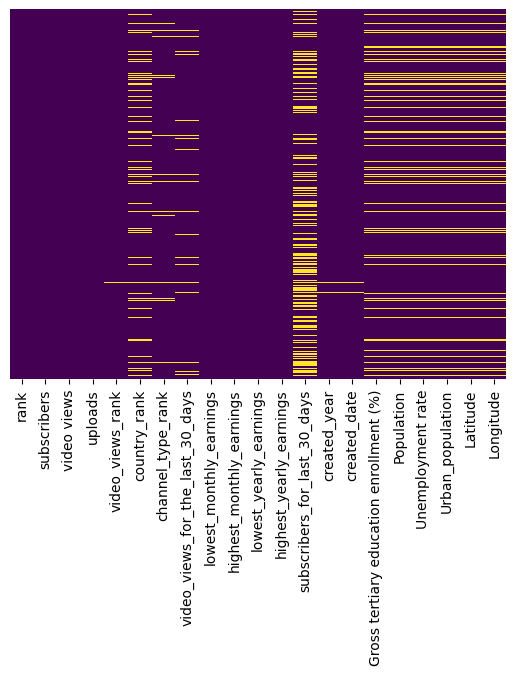

In [35]:
# plotting the data using heatmap for visualising missing values
sns.heatmap(df[numerical_features].isnull(), yticklabels = False, cbar = False, cmap='viridis' )

Since the data is in sorted form. We can use interpolate function for handling missing values

In [36]:
# handling missing values by interpolate()
df.interpolate(inplace = True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,5000000.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


<Axes: >

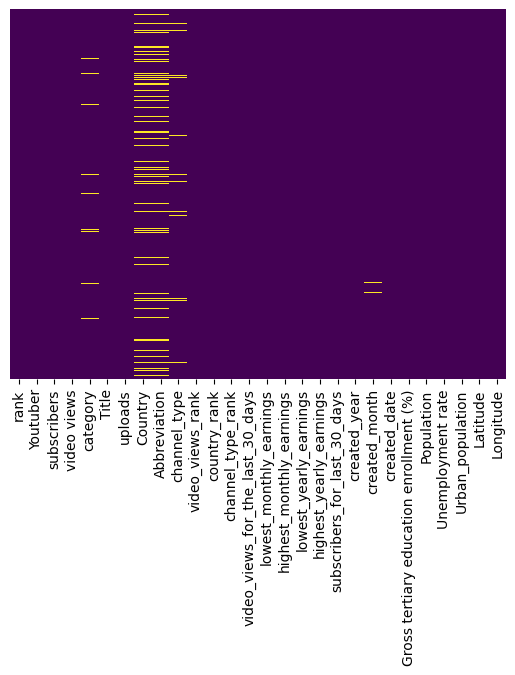

In [37]:
# now after handling the missing values plotting the data using heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap='viridis' )

The interpolate function handled all the missing values in numeric features

# Treating the outliers

In [38]:
# Using StandardScaler() for handling the outliers by standardising them
scaling = StandardScaler()
df[numerical_features] = scaling.fit_transform(df[numerical_features])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.730311,T-Series,12.674193,15.383174,Music,T-Series,0.319178,India,IN,Music,...,3.004824,-1.474806,Mar,-0.313801,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
1,-1.726829,YouTube Movies,8.392710,-0.782738,Film & Animation,youtubemovies,-0.269118,United States,US,Games,...,8.406310,-1.474806,Mar,-1.226426,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
2,-1.723348,MrBeast,8.164364,1.228702,Entertainment,MrBeast,-0.247439,United States,US,Entertainment,...,13.807796,-0.143701,Feb,0.484746,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
3,-1.719866,Cocomelon - Nursery Rhymes,7.936019,10.845374,Education,Cocomelon - Nursery Rhymes,-0.240847,United States,US,Education,...,1.204329,-1.474806,Sep,-1.682738,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
4,-1.716385,SET India,7.764759,9.710924,Shows,SET India,3.144908,India,IN,Entertainment,...,1.204329,-1.474806,Sep,0.484746,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.716385,Natan por Aï¿,-0.609821,-0.142510,Sports,Natan por Aï¿,-0.233992,Brazil,BR,Entertainment,...,0.664180,0.965552,Feb,-0.427879,-0.481065,-0.474661,0.599703,-0.267930,-2.043491,-0.464160
991,1.719866,Free Fire India Official,-0.609821,-0.664017,People & Blogs,Free Fire India Official,-0.225203,India,IN,Games,...,-0.056018,1.187403,Sep,-0.199723,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
992,1.723348,Panda,-0.609821,-0.625710,NaN,HybridPanda,-0.197313,United Kingdom,GB,Games,...,-0.594366,-1.474806,Sep,-0.541957,-0.135945,-0.791562,-1.131205,-1.110675,1.451617,0.126264
993,1.726829,RobTopGames,-0.609821,-0.756211,Gaming,RobTopGames,-0.268005,Sweden,SE,Games,...,-0.416117,-0.143701,May,-0.770113,0.141738,-0.914536,-0.578071,-1.420994,1.690109,0.395113


In [39]:
# printing the dataframe for seeing new standardised value
# and creating a new dataframe called df_n consisting only numerical features for removing the outliers by calculating iqr
df_n = df[numerical_features]
df_n

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.730311,12.674193,15.383174,0.319178,-0.406670,-0.322482,-0.387065,5.115141,7.347462,7.325663,...,7.347167,3.004824,-1.474806,-0.313801,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
1,-1.726829,8.392710,-0.782738,-0.269118,2.571724,6.149280,3.446598,-0.427506,-0.513573,-0.513750,...,-0.513543,8.406310,-1.474806,-1.226426,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
2,-1.723348,8.164364,1.228702,-0.247439,-0.406636,-0.322482,-0.387065,2.881390,4.178543,4.189898,...,4.178227,13.807796,-0.143701,0.484746,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
3,-1.719866,7.936019,10.845374,-0.240847,-0.406670,-0.321638,-0.387065,4.420469,6.361700,6.367513,...,6.360952,1.204329,-1.474806,-1.682738,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
4,-1.716385,7.764759,9.710924,3.144908,-0.406669,-0.321638,-0.386548,4.049814,5.834011,5.844885,...,5.831587,1.204329,-1.474806,0.484746,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.716385,-0.609821,-0.142510,-0.233992,-0.406286,-0.276912,-0.298739,0.928732,1.409220,1.402551,...,1.408125,0.664180,0.965552,-0.427879,-0.481065,-0.474661,0.599703,-0.267930,-2.043491,-0.464160
991,1.719866,-0.609821,-0.664017,-0.225203,-0.402161,-0.217840,-0.351941,-0.268603,-0.288017,-0.288236,...,-0.288744,-0.056018,1.187403,-0.199723,-1.401385,2.034577,-0.813626,1.636784,-0.294824,1.129585
992,1.723348,-0.609821,-0.625710,-0.197313,-0.311921,0.408323,0.233284,-0.427341,-0.513336,-0.513516,...,-0.513311,-0.594366,-1.474806,-0.541957,-0.135945,-0.791562,-1.131205,-1.110675,1.451617,0.126264
993,1.726829,-0.609821,-0.756211,-0.268005,-0.380882,-0.319950,-0.351941,-0.418004,-0.500095,-0.500248,...,-0.500070,-0.416117,-0.143701,-0.770113,0.141738,-0.914536,-0.578071,-1.420994,1.690109,0.395113


In [40]:
# calculating the 25 percentile of the data
percen25 = df_n.quantile(0.25)
percen25

rank                                      -0.865155
subscribers                               -0.484231
video views                               -0.478695
uploads                                   -0.263449
video_views_rank                          -0.406433
country_rank                              -0.313199
channel_type_rank                         -0.373635
video_views_for_the_last_30_days          -0.374697
lowest_monthly_earnings                   -0.475980
highest_monthly_earnings                  -0.475859
lowest_yearly_earnings                    -0.475854
highest_yearly_earnings                   -0.475708
subscribers_for_last_30_days              -0.416117
created_year                              -0.809254
created_date                              -0.884191
Gross tertiary education enrollment (%)   -1.056265
Population                                -0.701787
Unemployment rate                         -0.816781
Urban_population                          -1.063092
Latitude    

In [41]:
# calculating the 75 percentile of the data
percen75 = df_n.quantile(0.75)
percen75

rank                                       0.865155
subscribers                                0.092342
video views                                0.178333
uploads                                   -0.191000
video_views_rank                          -0.404043
country_rank                              -0.219528
channel_type_rank                         -0.315784
video_views_for_the_last_30_days          -0.014032
lowest_monthly_earnings                    0.014116
highest_monthly_earnings                   0.014801
lowest_yearly_earnings                     0.014920
highest_yearly_earnings                    0.015822
subscribers_for_last_30_days               0.124032
created_year                               0.743702
created_date                               0.826980
Gross tertiary education enrollment (%)    0.982720
Population                                -0.223097
Unemployment rate                          1.150734
Urban_population                           0.310661
Latitude    

In [42]:
# calculating the interquantile range(iqr)
iqr = percen75-percen25
iqr

rank                                       1.730311
subscribers                                0.576573
video views                                0.657028
uploads                                    0.072449
video_views_rank                           0.002391
country_rank                               0.093671
channel_type_rank                          0.057851
video_views_for_the_last_30_days           0.360665
lowest_monthly_earnings                    0.490096
highest_monthly_earnings                   0.490660
lowest_yearly_earnings                     0.490774
highest_yearly_earnings                    0.491530
subscribers_for_last_30_days               0.540149
created_year                               1.552955
created_date                               1.711172
Gross tertiary education enrollment (%)    2.038985
Population                                 0.478690
Unemployment rate                          1.967515
Urban_population                           1.373753
Latitude    

In [43]:
# using iqr creating upper and lower limit for removing the outliers
upper_limit = percen75 + 1.5 * iqr
lower_limit = percen25 - 1.5 * iqr
upper_limit


rank                                       3.460622
subscribers                                0.957202
video views                                1.163875
uploads                                   -0.082326
video_views_rank                          -0.400456
country_rank                              -0.079021
channel_type_rank                         -0.229008
video_views_for_the_last_30_days           0.526965
lowest_monthly_earnings                    0.749261
highest_monthly_earnings                   0.750791
lowest_yearly_earnings                     0.751081
highest_yearly_earnings                    0.753117
subscribers_for_last_30_days               0.934255
created_year                               3.073134
created_date                               3.393738
Gross tertiary education enrollment (%)    4.041198
Population                                 0.494938
Unemployment rate                          4.102007
Urban_population                           2.371291
Latitude    

In [36]:
lower_limit

rank                                      -3.460622
subscribers                               -1.349090
video views                               -1.464236
uploads                                   -0.372123
video_views_rank                          -0.410019
country_rank                              -0.453706
channel_type_rank                         -0.460412
video_views_for_the_last_30_days          -0.915694
lowest_monthly_earnings                   -1.211125
highest_monthly_earnings                  -1.211849
lowest_yearly_earnings                    -1.212015
highest_yearly_earnings                   -1.213003
subscribers_for_last_30_days              -1.226340
created_year                              -3.138686
created_date                              -3.450949
Gross tertiary education enrollment (%)   -4.114743
Population                                -1.419823
Unemployment rate                         -3.768054
Urban_population                          -3.123722
Latitude    

In [44]:
# removing the outliers from the data by selcting values below the upper limit and storing it in a new dataframe new_df
new_df = df_n[df_n< upper_limit]
new_df

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.730311,NaN,NaN,NaN,-0.406670,-0.322482,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-1.474806,-0.313801,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
1,-1.726829,NaN,-0.782738,-0.269118,NaN,NaN,NaN,-0.427506,-0.513573,-0.513750,...,-0.513543,NaN,-1.474806,-1.226426,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
2,-1.723348,NaN,NaN,-0.247439,-0.406636,-0.322482,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-0.143701,0.484746,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
3,-1.719866,NaN,NaN,-0.240847,-0.406670,-0.321638,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-1.474806,-1.682738,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
4,-1.716385,NaN,NaN,NaN,-0.406669,-0.321638,-0.386548,NaN,NaN,NaN,...,NaN,NaN,-1.474806,0.484746,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.716385,-0.609821,-0.142510,-0.233992,-0.406286,-0.276912,-0.298739,NaN,NaN,NaN,...,NaN,0.664180,0.965552,-0.427879,-0.481065,-0.474661,0.599703,-0.267930,-2.043491,-0.464160
991,1.719866,-0.609821,-0.664017,-0.225203,-0.402161,-0.217840,-0.351941,-0.268603,-0.288017,-0.288236,...,-0.288744,-0.056018,1.187403,-0.199723,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
992,1.723348,-0.609821,-0.625710,-0.197313,NaN,NaN,NaN,-0.427341,-0.513336,-0.513516,...,-0.513311,-0.594366,-1.474806,-0.541957,-0.135945,-0.791562,-1.131205,-1.110675,1.451617,0.126264
993,1.726829,-0.609821,-0.756211,-0.268005,NaN,-0.319950,-0.351941,-0.418004,-0.500095,-0.500248,...,-0.500070,-0.416117,-0.143701,-0.770113,0.141738,-0.914536,-0.578071,-1.420994,1.690109,0.395113


In [45]:
# removing the outliers from the data by selcting values above the lower limit and storing it in a new dataframe new_df2
new_df2 = new_df[new_df> lower_limit]
new_df2

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.730311,NaN,NaN,NaN,-0.406670,-0.322482,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-1.474806,-0.313801,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
1,-1.726829,NaN,-0.782738,-0.269118,NaN,NaN,NaN,-0.427506,-0.513573,-0.513750,...,-0.513543,NaN,-1.474806,-1.226426,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
2,-1.723348,NaN,NaN,-0.247439,-0.406636,-0.322482,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-0.143701,0.484746,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
3,-1.719866,NaN,NaN,-0.240847,-0.406670,-0.321638,-0.387065,NaN,NaN,NaN,...,NaN,NaN,-1.474806,-1.682738,0.982720,-0.223097,1.150734,0.310661,0.533429,-0.997336
4,-1.716385,NaN,NaN,NaN,-0.406669,-0.321638,-0.386548,NaN,NaN,NaN,...,NaN,NaN,-1.474806,0.484746,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.716385,-0.609821,-0.142510,-0.233992,-0.406286,-0.276912,-0.298739,NaN,NaN,NaN,...,NaN,0.664180,0.965552,-0.427879,-0.481065,-0.474661,0.599703,-0.267930,NaN,-0.464160
991,1.719866,-0.609821,-0.664017,-0.225203,-0.402161,-0.217840,-0.351941,-0.268603,-0.288017,-0.288236,...,-0.288744,-0.056018,1.187403,-0.199723,-1.401385,NaN,-0.813626,1.636784,-0.294824,1.129585
992,1.723348,-0.609821,-0.625710,-0.197313,NaN,NaN,NaN,-0.427341,-0.513336,-0.513516,...,-0.513311,-0.594366,-1.474806,-0.541957,-0.135945,-0.791562,-1.131205,-1.110675,1.451617,0.126264
993,1.726829,-0.609821,-0.756211,-0.268005,NaN,-0.319950,-0.351941,-0.418004,-0.500095,-0.500248,...,-0.500070,-0.416117,-0.143701,-0.770113,0.141738,-0.914536,-0.578071,-1.420994,1.690109,0.395113


# Data visualisation

Now visualising the data after handling the ouliers

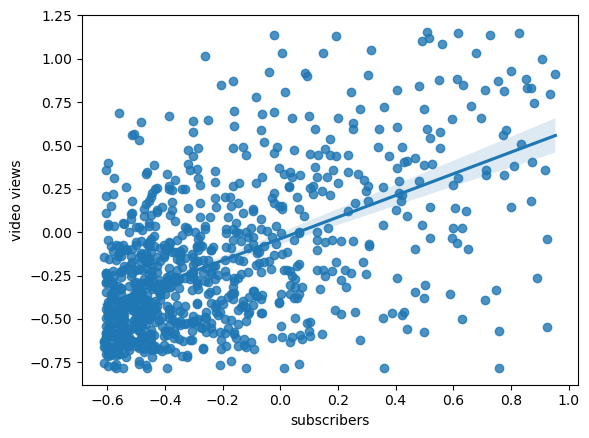

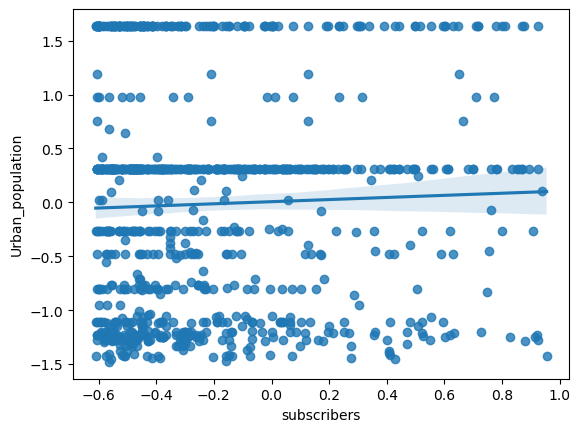

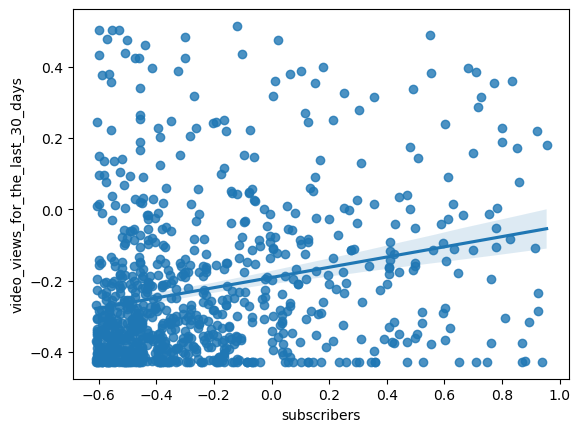

In [47]:
# using scatter plot for plotting subscribers and features_sub
for i in new_df2[features_sub]:
    plt.figure()
    sns.regplot(x=new_df2['subscribers'], y= new_df2[features_sub][i])
    plt.xlabel('subscribers')
    plt.ylabel(i)
    plt.show()

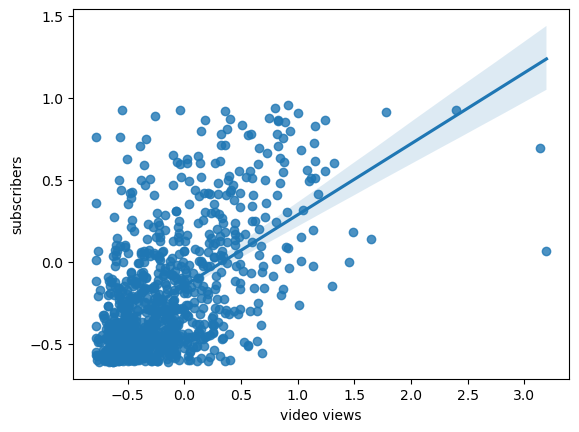

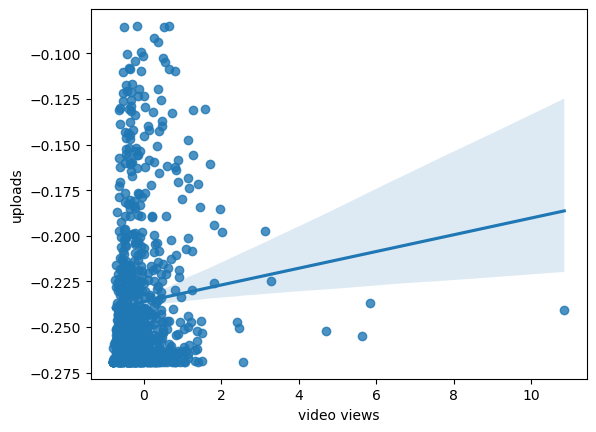

In [48]:
# using scatter plot for plotting video views and features_views
for i in new_df2[features_views]:
    plt.figure()
    sns.regplot(x=df['video views'], y= new_df2[features_views][i])
    plt.xlabel('video views')
    plt.ylabel(i)
    plt.show()

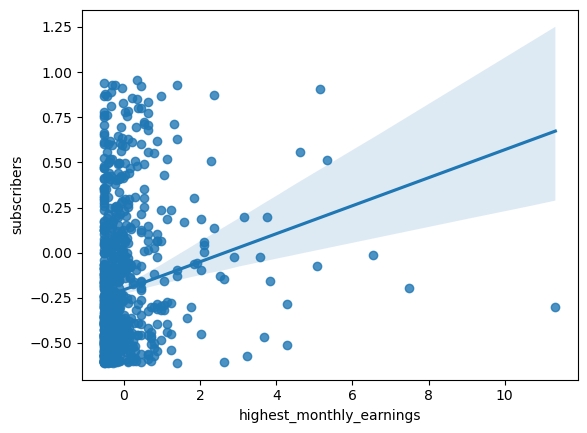

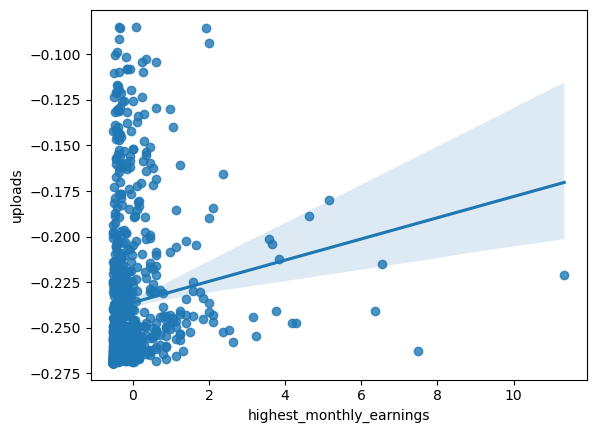

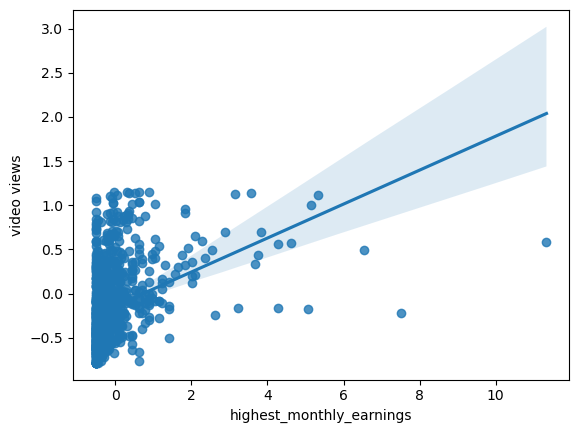

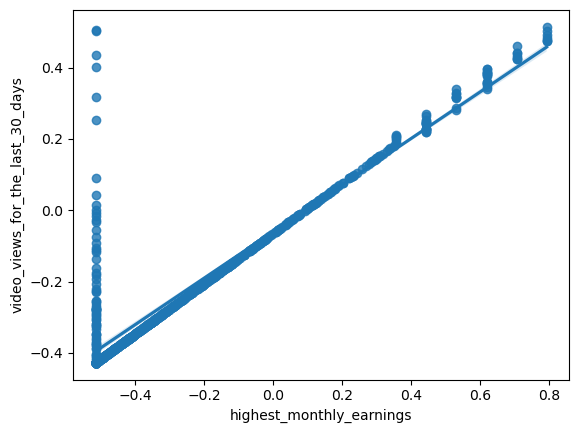

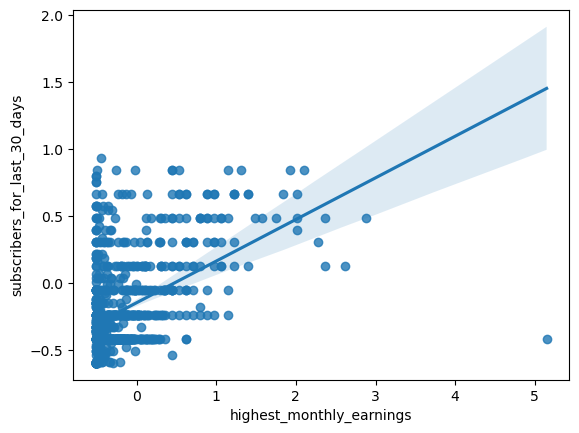

In [49]:
# using scatter plot for plotting highest_monthly_earnings and features_money_mon
for i in new_df2[features_money_mon]:
    plt.figure()
    sns.regplot(x=df['highest_monthly_earnings'], y= new_df2[features_money_mon][i])
    plt.xlabel('highest_monthly_earnings')
    plt.ylabel(i)
    plt.show()

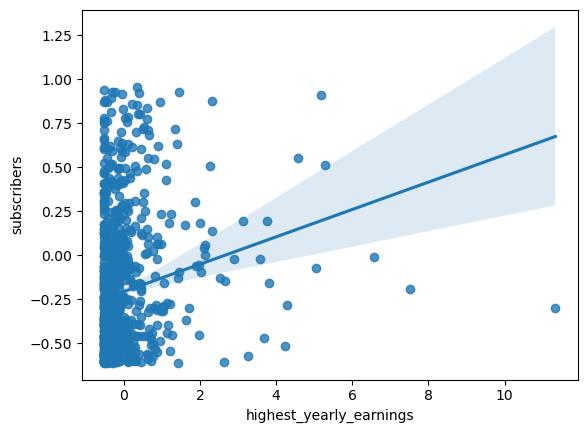

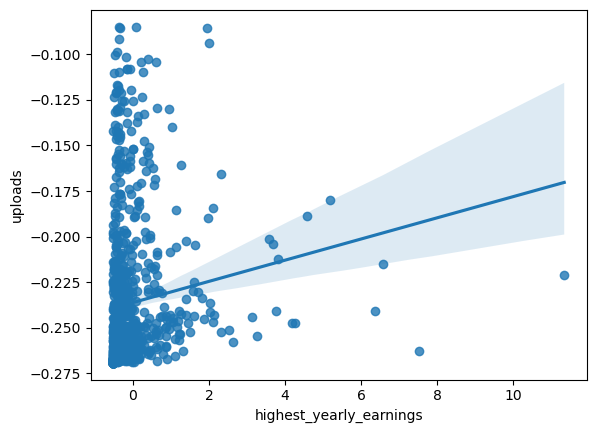

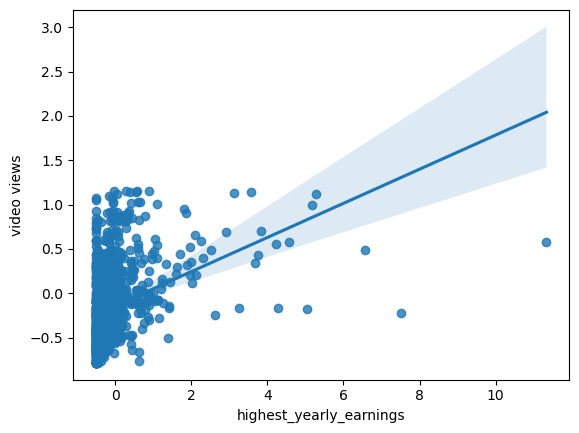

In [50]:
# using scatter plot for plotting highest_yearly_earnings and features_money_year
for i in new_df2[features_money_year]:
    plt.figure()
    sns.regplot(x=df['highest_yearly_earnings'], y= new_df2[features_money_year][i])
    plt.xlabel('highest_yearly_earnings')
    plt.ylabel(i)
    plt.show()

# Conclusion

By analysing all the information we got form Exploratory Data Analysis(EDA) of the data. We can come to the conclusion for our goals as following:

1.Subscribers:
For becoming successful and gaining more subscribers in Youtube plaform one has to do the following:
i) Maintaining a good view count.
ii) Making videos on Music,Entertainment,Games,etc.
iii) Upload content on the platform frequently.
iv) Having viewers from India, U.S.A, Brazil(these country has the top three viewers count).

2.Views:
For gaining more subscribers in Youtube plaform one has to do the following:
i) Having a good number of subscribers.
ii) Making videos on Music,Entertainment,Games,etc.
iii) Upload content on the platform frequently.
iv) Having viewers from India, U.S.A, Brazil(these country has the top three viewers count).

3.Money:
For generating more money on Youtube plaform one has to do the following:
i) Maintaining a good view count.
ii) Having a good number of subscribers.
iii) Making videos on Music,Entertainment,Games,etc.
iv) Upload content on the platform frequently.
v) Having viewers from India, U.S.A, Brazil(these country has the top three viewers count).